In [1]:
from skiier import *
from ski_env import *
from rl_logger import rl_metrics_logger
import matplotlib.pyplot as plt
import gym
import papermill as pm
%matplotlib inline

/home/ai2-yoda/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
repeat_freq = 4
ski_env = gym.make("Skiing-v0")
ski_env_w = Env_wrapper(ski_env, repeat_freq)
skiier = Skiier(action_space = 3, LEARNING_RATE = 0.0001, LAMBDA = 0.075, GAMMA = 0.99, 
                MEMORY_CAPACITY = 20000, BATCH_SIZE = 1000, max_explore_game = 300, 
                repeat_freq = repeat_freq)

/home/ai2-yoda/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


In [ ]:
num_steps = 30000
num_episodes = 1000
logger = rl_metrics_logger()
#start_replay_episode = 10
frames_seen = 0
for episode in range(num_episodes):
    state = ski_env_w.reset()
    total_reward = 0
    for time_step in range(num_steps):
        action = skiier.act(state)
        next_state, reward, done, info = ski_env_w.step(action)
        skiier.observe(state, action, reward, next_state, done)
        state = next_state
        skiier.episode = episode
        total_reward += reward
        if done:
            average_reward = np.around(total_reward/time_step)
            print("episode: {}/{}, frames: {}, epsilon: {}, reward: {}".format(episode, 
                                                                  num_episodes, 
                                                                  time_step*repeat_freq, 
                                                                  skiier.epsilon,
                                                                  average_reward))
            break
    
    #if episode+1 >= start_replay_episode:
    if skiier.memory.is_full():
        skiier.replay()
        model_loss = np.mean(skiier.brain.history.losses)
    else:
        model_loss = 0
    #logging
    frames_seen += time_step*repeat_freq
    print("model_loss: {}, frames_seen: {}, memory_level: {}".format(model_loss, 
                                                                     frames_seen, 
                                                                     skiier.memory.mem_size))
    logger.store(episode, time_step*repeat_freq, skiier.epsilon, average_reward, model_loss)

episode: 0/1000, frames: 2168, epsilon: 1, reward: -36.0
model_loss: 0, frames_seen: 2168, memory_level: 543
episode: 1/1000, frames: 1956, epsilon: 1, reward: -33.0
model_loss: 0, frames_seen: 4124, memory_level: 1033
episode: 2/1000, frames: 1588, epsilon: 1, reward: -39.0
model_loss: 0, frames_seen: 5712, memory_level: 1431
episode: 3/1000, frames: 1968, epsilon: 1, reward: -38.0
model_loss: 0, frames_seen: 7680, memory_level: 1924
episode: 4/1000, frames: 2008, epsilon: 1, reward: -35.0
model_loss: 0, frames_seen: 9688, memory_level: 2427
episode: 5/1000, frames: 1836, epsilon: 1, reward: -39.0
model_loss: 0, frames_seen: 11524, memory_level: 2887
episode: 6/1000, frames: 1820, epsilon: 1, reward: -39.0
model_loss: 0, frames_seen: 13344, memory_level: 3343
episode: 7/1000, frames: 1824, epsilon: 1, reward: -36.0
model_loss: 0, frames_seen: 15168, memory_level: 3800
episode: 8/1000, frames: 1724, epsilon: 1, reward: -38.0
model_loss: 0, frames_seen: 16892, memory_level: 4232
episode

model_loss: 14.795599937438965, frames_seen: 145748, memory_level: 20000
episode: 67/1000, frames: 3480, epsilon: 0.7822, reward: -31.0
model_loss: 15.582870483398438, frames_seen: 149228, memory_level: 20000
episode: 68/1000, frames: 3076, epsilon: 0.7789, reward: -31.0
model_loss: 6.3159685134887695, frames_seen: 152304, memory_level: 20000
episode: 69/1000, frames: 2952, epsilon: 0.7756000000000001, reward: -33.0
model_loss: 6.323408603668213, frames_seen: 155256, memory_level: 20000
episode: 70/1000, frames: 3080, epsilon: 0.7723, reward: -32.0
model_loss: 6.2683491706848145, frames_seen: 158336, memory_level: 20000
episode: 71/1000, frames: 4248, epsilon: 0.769, reward: -29.0
model_loss: 6.34126615524292, frames_seen: 162584, memory_level: 20000
episode: 72/1000, frames: 3948, epsilon: 0.7657, reward: -30.0
model_loss: 15.036331176757812, frames_seen: 166532, memory_level: 20000
episode: 73/1000, frames: 2000, epsilon: 0.7624, reward: -36.0
model_loss: 6.303455829620361, frames_se

episode: 126/1000, frames: 6044, epsilon: 0.5875, reward: -20.0
model_loss: 6.32462739944458, frames_seen: 453032, memory_level: 20000
episode: 127/1000, frames: 6036, epsilon: 0.5842, reward: -20.0
model_loss: 6.337812423706055, frames_seen: 459068, memory_level: 20000
episode: 128/1000, frames: 6000, epsilon: 0.5809, reward: -20.0
model_loss: 6.3302412033081055, frames_seen: 465068, memory_level: 20000
episode: 129/1000, frames: 6020, epsilon: 0.5776, reward: -20.0
model_loss: 6.336532115936279, frames_seen: 471088, memory_level: 20000
episode: 130/1000, frames: 6068, epsilon: 0.5743, reward: -20.0
model_loss: 6.346406936645508, frames_seen: 477156, memory_level: 20000
episode: 131/1000, frames: 6000, epsilon: 0.571, reward: -20.0
model_loss: 6.411810398101807, frames_seen: 483156, memory_level: 20000
episode: 132/1000, frames: 5972, epsilon: 0.5677, reward: -20.0
model_loss: 6.373526096343994, frames_seen: 489128, memory_level: 20000
episode: 133/1000, frames: 6048, epsilon: 0.5644,

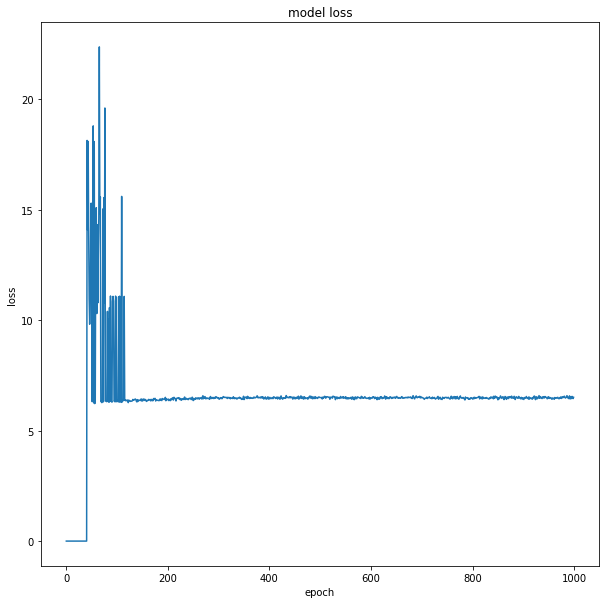

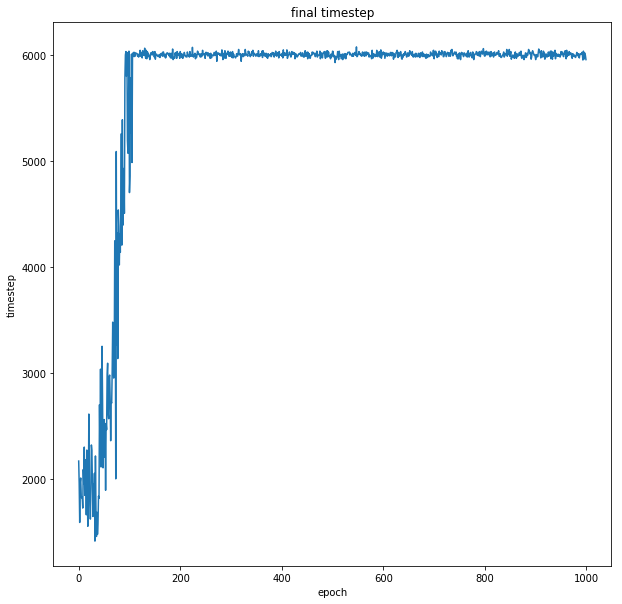

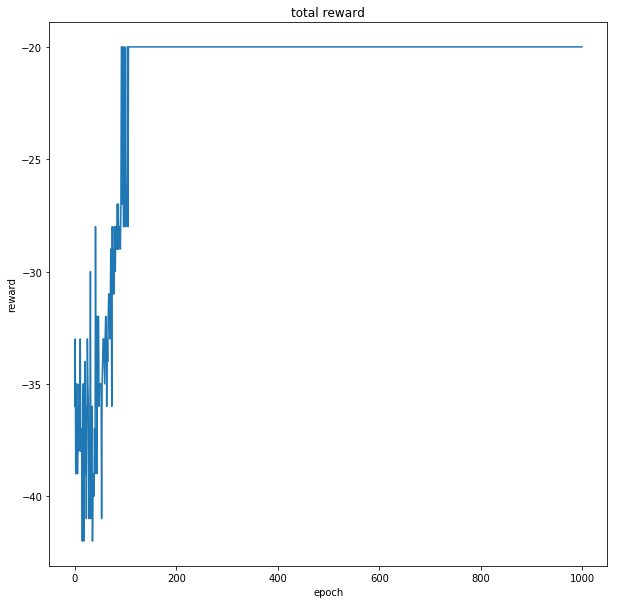

In [6]:
logger.plot_metrics()

In [ ]:
file_name = "model_{}.hdf5".format(average_reward)
skiier.brain.model.save(file_name)

# Manually Playing Game to Check Reward Structure

In [2]:
repeat_freq = 4
ski_env = gym.make("Skiing-v0")
ski_env_w = Env_wrapper(ski_env, repeat_freq)
skiier = Skiier(action_space = 3, LEARNING_RATE = 0.0001, LAMBDA = 0.075, GAMMA = 0.99, 
                MEMORY_CAPACITY = 10000, BATCH_SIZE = 1000, max_explore_game = 300, 
                repeat_freq = repeat_freq)

/home/ai2-yoda/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


In [3]:
state = ski_env_w.reset()
total_reward = []

In [5]:
next_state.shape

(125, 80, 10)

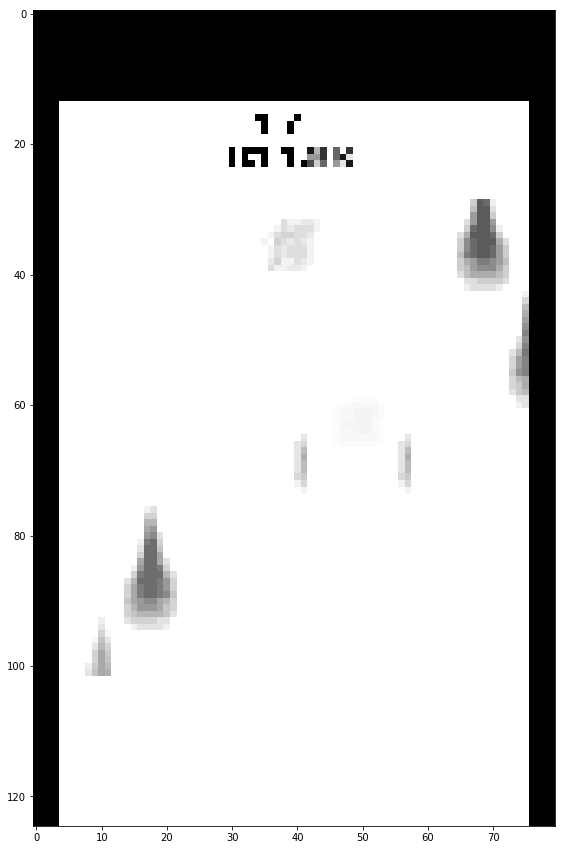

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(np.mean(next_state,axis=2),cmap="gray")

-50.0


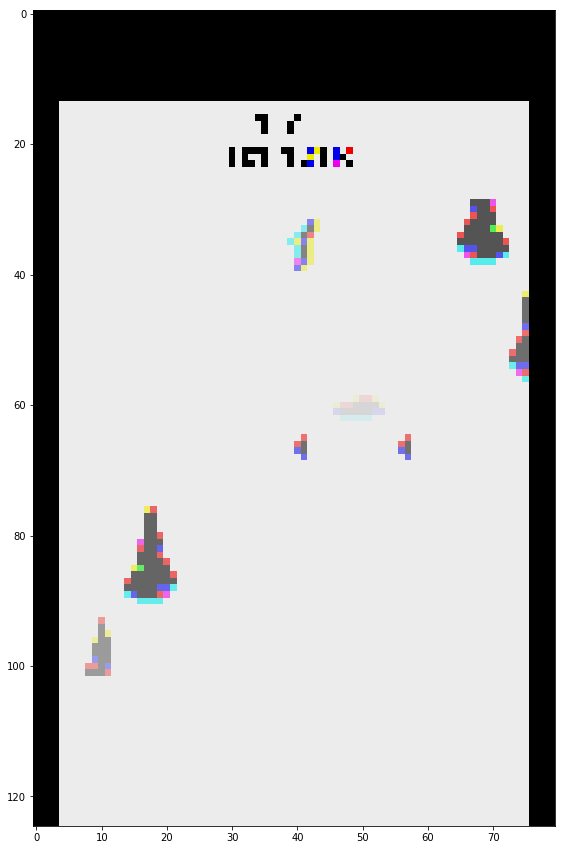

In [27]:
action = 1 #0 nothing, 1 right, 2 left
next_state, reward, done, info = ski_env_w.step(action)
total_reward.append(reward)
print(reward)
plt.figure(figsize=(15,15))
plt.imshow(next_state[:,:,7:],cmap="gray")

In [26]:
total_reward

[-20.0,
 -18.0,
 -20.0,
 -22.0,
 -22.0,
 -20.0,
 -23.0,
 -23.0,
 -20.0,
 -23.0,
 -24.0,
 -23.0,
 -20.0,
 -17.0,
 -21.0,
 -19.0,
 -19.0,
 -15.0,
 -19.0,
 -18.0]

# CODE GRAVEYARD

In [6]:
LAMBDA = 0.075
MIN_EPSILON = 0.01
MAX_EPSILON = 1.0

In [7]:
import math

In [14]:
min_explore_game = 100

In [19]:
for i in range(200):
#     print(MIN_EPSILON + (MAX_EPSILON - MIN_EPSILON) 
#                         * math.exp(-LAMBDA * i))
    if i <= min_explore_game:
        print( ((MIN_EPSILON-MAX_EPSILON)/min_explore_game)*i + MAX_EPSILON)
    else:
        print(MIN_EPSILON)

1.0
0.9901
0.9802
0.9703
0.9604
0.9505
0.9406
0.9307
0.9208000000000001
0.9109
0.901
0.8911
0.8812
0.8713
0.8613999999999999
0.8515
0.8416
0.8317
0.8218000000000001
0.8119000000000001
0.802
0.7921
0.7822
0.7723
0.7624
0.7525000000000001
0.7426
0.7327
0.7228
0.7129000000000001
0.7030000000000001
0.6931
0.6832
0.6733
0.6634
0.6535
0.6436000000000001
0.6337
0.6238
0.6139000000000001
0.6040000000000001
0.5941000000000001
0.5842
0.5743
0.5644
0.5545
0.5446
0.5347000000000001
0.5248
0.5149
0.5050000000000001
0.4951000000000001
0.4852000000000001
0.47530000000000006
0.46540000000000004
0.4555
0.4456
0.4357000000000001
0.42580000000000007
0.41590000000000005
0.406
0.3961
0.3862000000000001
0.3763000000000001
0.36640000000000006
0.35650000000000004
0.3466
0.3367000000000001
0.3268000000000001
0.31690000000000007
0.30700000000000005
0.29710000000000003
0.2872000000000001
0.2773000000000001
0.2674000000000001
0.25750000000000006
0.24760000000000004
0.23770000000000002
0.2278000000000001
0.2179000

# Outputs

In [5]:
def play_game(num_steps):
    state = ski_env_w.reset()
    state_list = [state]
    reward_list = []
    for time_step in range(num_steps):
        action = skiier.act(state)
        next_state, reward, done, info = ski_env_w.step(action)
        skiier.observe(state, action, reward, next_state, done)
        state = next_state
        state_list.append(state)
        reward_list.append(reward)
        skiier.episode = episode
        if done:
            break
    return state_list, reward_list

In [ ]:
states_out, rewards_out = play_game(num_steps = 10000)

In [ ]:
file_name = "models/test_run.hdf5"
skiier.brain.model.save(file_name)

In [12]:
GAMMA = 0.9
MAX_EPSILON = 1
MIN_EPSILON = 0.01
LAMBDA = 0.03
NUM_GAMES = 100
lr = 0.01
for game_num in range(NUM_GAMES):
    #epsilon = (MIN_EPSILON + (MAX_EPSILON - MIN_EPSILON) 
    #        * (1-math.exp(-LAMBDA * game_num)))
    #lr *= (1 / (1+lr_decay * num_games))
    #print(MAX_EPSILON - MIN_EPSILON)
    #print(math.exp(-LAMBDA * game_num))
    #print(lr)

0.00909090909090909
0.008264462809917354
0.007513148009015776
0.006830134553650705
0.00620921323059155
0.005644739300537773
0.005131581182307066
0.004665073802097333
0.0042409761837248474
0.0038554328942953155
0.003504938994813923
0.0031863081771035663
0.002896643797366878
0.0026333125430607982
0.002393920493691635
0.002176291357901486
0.001978446689001351
0.001798587899092137
0.001635079908265579
0.0014864362802414354
0.0013513057093103957
0.0012284597357367234
0.0011167815779424758
0.0010152559799477053
0.0009229599817706411
0.000839054528882401
0.0007627768444385463
0.0006934334949441329
0.0006303940863128481
0.00057308553301168
0.0005209868481924364
0.0004736244074476694
0.00043056764313424494
0.00039142513012204084
0.0003558410273836735
0.0003234918430760668
0.0002940834937055152
0.00026734863064137743
0.00024304420967397947
0.0002209492815217995
0.0002008629832016359
0.0001826027120014872
0.00016600246545589746
0.00015091133223263406
0.0001371921202114855
0.00012472010928316863
0

In [ ]:
num_steps = 10000
num_episodes = 5 #converges around 30-45 with current hyper parameters

for episode in range(num_episodes):
    state = ski_env_w.reset()
    total_reward = 0
    for time_step in range(num_steps):
        action = skiier.act(state)
        #print("Action:", action)
        next_state, reward, done, info = ski_env_w.step(action)
        if next_state.shape != (125, 80, 4):
            print(next_state.shape)
            break
        if done:
            print(done)
            print(next_state.shape)
            done = False
            break

In [4]:
#woo! test was successful

- #checking to make sure score increases over time
- #make updates to epsilon
- #pull out memory as hyper parameter